In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploring the Data

In [ ]:
# First, I'm just going to get a sense of the  data I'm working with here. 

first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

In [ ]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

In [ ]:
for row in session.query(Measurement.id, Measurement.station, Measurement.prcp, Measurement.date, Measurement.tobs).limit(10).all():
    print(row)

In [ ]:
for row in session.query(Station.station, Station.name, Station.longitude, Station.id, Station.latitude, Station.elevation):
    print(row)
    

In [ ]:
count_measurement = session.query(Measurement).count()
count_measurement

In [ ]:
count_station = session.query(Station).count()
count_station

# Exploratory Precipitation Analysis

In [9]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
most_rec_date = session.query(func.max(Measurement.date)).first()
most_rec_date

# An alternative to the above.
# latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# latest_date

('2017-08-23',)

In [10]:
# Calculate the date one year from the last date in data set.
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [11]:
# Perform a query to retrieve the date and precipitation scores

last_year_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).all()


In [26]:
last_year_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

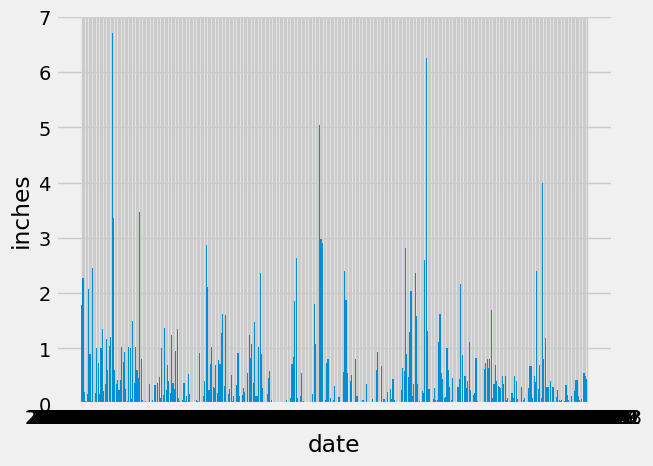

In [12]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(last_year_data, columns=['date', 'precipitation'])

# Sort the dataframe by date
df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(df['date'], df['precipitation'])


# x = np.arange(0, 13, 1)
# plt.xticks(x)

plt.xlabel('date')
plt.ylabel('inches')

# plt.tight_layout()

plt.show()


# WHAT AM I MISSING HERE? DOESN'T LOOK LIKE THE STARTER CODE OUTPUT...

<Axes: xlabel='date'>

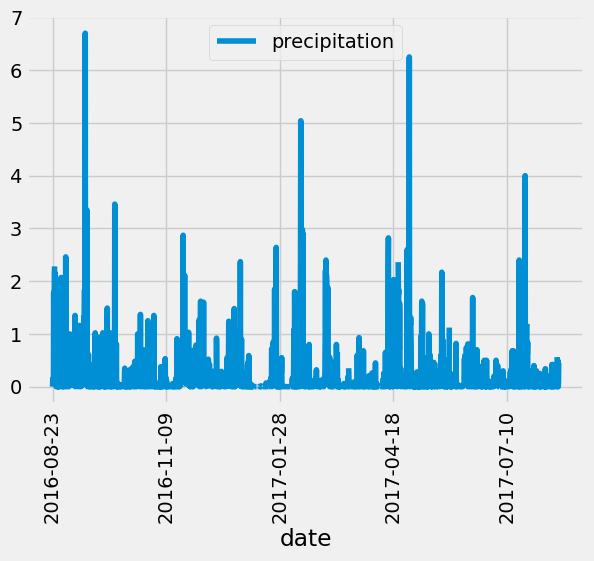

In [28]:
# With Limei ... come back and clean up the previous cell

df.plot(x='date',y='precipitation', rot=90)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2230 non-null   object 
 1   precipitation  2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.0+ KB


In [31]:
# This is a helpful debugging tool. 

print(type(df['precipitation']))

<class 'pandas.core.series.Series'>


In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data

df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(Measurement).group_by(Measurement.station).count()
number_stations

9

In [32]:
# CAN DELETE -- USING THIS FOR PART 2: 

station_names = session.query(Station.station).all()

for name in station_names:
    print(name)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]

most_active_calcs = session.query(*sel).filter(Measurement.station == "USC00519281").all()
print(most_active_calcs)


[(54.0, 85.0, 71.66378066378067)]


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# First, need to find the most recent date for that station. 
rec_date_most_active = session.query(func.max(Measurement.date)).filter(Measurement.station == "USC00519281").first()
rec_date_most_active

('2017-08-18',)

In [23]:
# Then, need to query the last 12 months of TOBS data for that same station. 

last_year_data_most_active = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= '2016-08-18').all()
last_year_data_most_active

[('2016-08-18', 80.0),
 ('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-

In [ ]:
# Then plot as a histogram. 
df_tobs = pd.DataFrame(last_year_data_most_active, columns=['date', 'precipitation'])
df_tobs


In [ ]:
df_tobs.hist(column='precipitation', bins=12)


plt.xlabel('temperature')
plt.ylabel('frequency')

plt.show()


# Close Session

In [ ]:
# Close Session
session.close()